In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = df.iloc[: ,1:5].values
y = df.iloc[: , -1].values

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


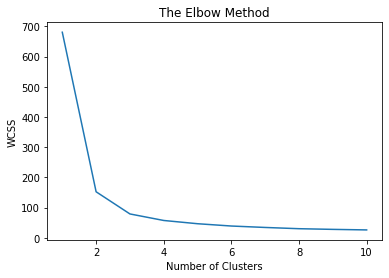

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , n_init =10 , random_state =0)
y_kmeans = kmeans.fit_predict(X)

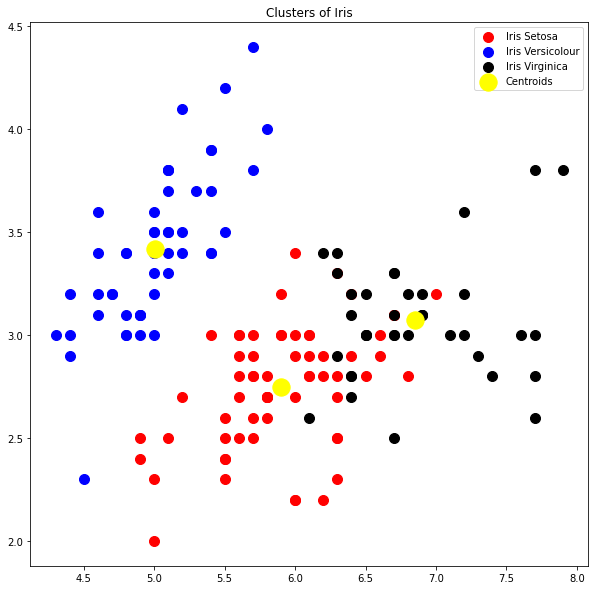

In [24]:
plt.figure(figsize=(10,10)) 
plt.scatter(X[y_kmeans == 0 , 0] , X[y_kmeans == 0 , 1] , s = 100 , c = 'red' , label = 'Iris Setosa')
plt.scatter(X[y_kmeans == 1 , 0] , X[y_kmeans == 1 , 1] , s = 100 , c = 'blue' , label = 'Iris Versicolour')
plt.scatter(X[y_kmeans == 2 , 0] , X[y_kmeans == 2 , 1] , s = 100 , c = 'black' , label = 'Iris Virginica' )
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s = 300 , c = 'yellow' , label = 'Centroids')
plt.title('Clusters of Iris')
plt.legend()

plt.show()
